In [1]:
# Read in the document-term matrix
import pandas as pd

df = pd.read_pickle('../1 - Data/dtm.pkl')
df = df.transpose()
df.head()

,Donald Trump,Greta Thunberg,Hillary Clinton,Jacinda Ardern,John F Kennedy,Justin Trudeau,Nelson Mandela,Simon Sinek,Steve Jobs,Sundar Pichai,Tim Cook
abandon,0,0,2,0,0,0,0,0,0,0,0
ability,1,0,1,0,0,0,0,1,0,1,0
able,1,0,2,2,0,0,0,2,0,0,0
abolish,0,0,0,0,1,0,0,0,0,0,0
abraham,0,0,0,0,0,1,0,0,0,0,0


In [2]:
# Find the top 30 words said by each speaker
top_dict = {}
for c in df.columns:
    top = df[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'Donald Trump': [('great', 28),
  ('today', 22),
  ('jerry', 18),
  ('going', 18),
  ('just', 18),
  ('people', 16),
  ('right', 16),
  ('liberty', 15),
  ('dont', 15),
  ('want', 15),
  ('thank', 14),
  ('know', 14),
  ('god', 14),
  ('jim', 13),
  ('university', 12),
  ('president', 12),
  ('did', 12),
  ('youre', 11),
  ('time', 11),
  ('love', 11),
  ('faith', 10),
  ('like', 10),
  ('say', 9),
  ('george', 9),
  ('family', 9),
  ('long', 9),
  ('vision', 9),
  ('world', 9),
  ('doing', 8),
  ('america', 8)],
 'Greta Thunberg': [('people', 4),
  ('dare', 4),
  ('climate', 4),
  ('change', 3),
  ('world', 3),
  ('solutions', 3),
  ('years', 3),
  ('today', 3),
  ('understand', 2),
  ('half', 2),
  ('say', 2),
  ('staying', 2),
  ('degrees', 2),
  ('numbers', 2),
  ('greta', 2),
  ('right', 2),
  ('away', 2),
  ('like', 2),
  ('air', 2),
  ('line', 2),
  ('failing', 2),
  ('come', 2),
  ('emissions', 2),
  ('message', 2),
  ('believe', 2),
  ('risk', 2),
  ('gigatons', 2),
  ('young

In [3]:
for speaker, top_words in top_dict.items():
    print(speaker)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Donald Trump
great, today, jerry, going, just, people, right, liberty, dont, want, thank, know, god, jim
---
Greta Thunberg
people, dare, climate, change, world, solutions, years, today, understand, half, say, staying, degrees, numbers
---
Hillary Clinton
yale, women, just, law, need, thats, class, going, like, resilience, country, years, students, people
---
Jacinda Ardern
new, zealand, world, people, like, emissions, make, just, technology, change, climate, global, sense, countries
---
John F Kennedy
let, sides, world, new, pledge, ask, president, citizens, nations, war, country, free, man, fellow
---
Justin Trudeau
world, think, people, like, leaders, tribe, want, dont, different, youre, thats, language, good, change
---
Nelson Mandela
world, great, citizens, century, institution, freedom, africa, south, nations, award, progress, equality, millions, men
---
Simon Sinek
want, cup, people, said, coffee, just, took, learn, world, dont, line, got, like, guys
---
Steve Jobs
life, college

In [4]:
# In case we need to add some words to the stop word list
from collections import Counter

words = []
for speaker in df.columns:
    top = [word for (word, count) in top_dict[speaker]]
    for t in top:
        words.append(t)

words

['great',
 'today',
 'jerry',
 'going',
 'just',
 'people',
 'right',
 'liberty',
 'dont',
 'want',
 'thank',
 'know',
 'god',
 'jim',
 'university',
 'president',
 'did',
 'youre',
 'time',
 'love',
 'faith',
 'like',
 'say',
 'george',
 'family',
 'long',
 'vision',
 'world',
 'doing',
 'america',
 'people',
 'dare',
 'climate',
 'change',
 'world',
 'solutions',
 'years',
 'today',
 'understand',
 'half',
 'say',
 'staying',
 'degrees',
 'numbers',
 'greta',
 'right',
 'away',
 'like',
 'air',
 'line',
 'failing',
 'come',
 'emissions',
 'message',
 'believe',
 'risk',
 'gigatons',
 'young',
 'chance',
 'acceptable',
 'yale',
 'women',
 'just',
 'law',
 'need',
 'thats',
 'class',
 'going',
 'like',
 'resilience',
 'country',
 'years',
 'students',
 'people',
 'said',
 'day',
 'moment',
 'think',
 'youve',
 'election',
 'times',
 'world',
 'leaders',
 'american',
 'make',
 'im',
 'politics',
 'went',
 'dont',
 'say',
 'new',
 'zealand',
 'world',
 'people',
 'like',
 'emissions',
 '

In [5]:
# Aggregate the list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('world', 10),
 ('people', 8),
 ('dont', 7),
 ('today', 6),
 ('just', 6),
 ('like', 6),
 ('know', 5),
 ('time', 5),
 ('years', 5),
 ('want', 4),
 ('say', 4),
 ('think', 4),
 ('make', 4),
 ('great', 3),
 ('going', 3),
 ('change', 3),
 ('need', 3),
 ('thats', 3),
 ('leaders', 3),
 ('life', 3),
 ('way', 3),
 ('got', 3),
 ('right', 2),
 ('president', 2),
 ('did', 2),
 ('youre', 2),
 ('love', 2),
 ('climate', 2),
 ('away', 2),
 ('line', 2),
 ('emissions', 2),
 ('women', 2),
 ('class', 2),
 ('country', 2),
 ('said', 2),
 ('day', 2),
 ('new', 2),
 ('technology', 2),
 ('countries', 2),
 ('question', 2),
 ('citizens', 2),
 ('nations', 2),
 ('free', 2),
 ('help', 2),
 ('freedom', 2),
 ('good', 2),
 ('things', 2),
 ('work', 2),
 ('thing', 2),
 ('didnt', 2),
 ('parents', 2),
 ('better', 2),
 ('jerry', 1),
 ('liberty', 1),
 ('thank', 1),
 ('god', 1),
 ('jim', 1),
 ('university', 1),
 ('faith', 1),
 ('george', 1),
 ('family', 1),
 ('long', 1),
 ('vision', 1),
 ('doing', 1),
 ('america', 1),
 ('dare

In [6]:
# If more than half of the speakers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['world', 'people', 'dont']

In [7]:
# Update the document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('../1 - Data/data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open('../1 - Data/cv_stop.pkl', 'wb'))
data_stop.to_pickle('../1 - Data/dtm_stop.pkl')

In [8]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap='Dark2', max_font_size=150, random_state=42)

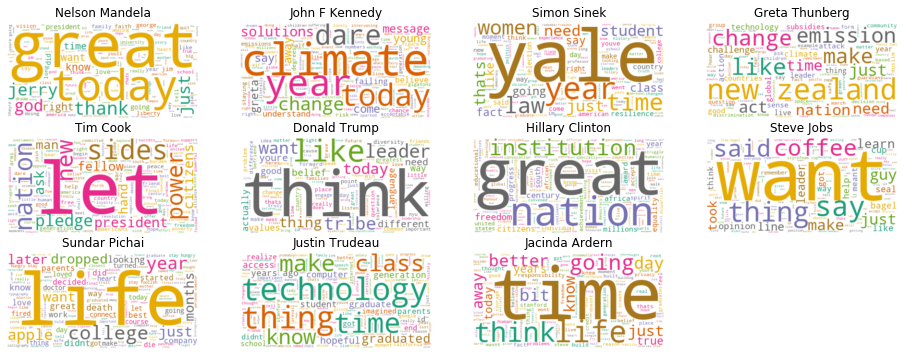

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,6]

full_names = ['Nelson Mandela',
            'John F Kennedy',
            'Simon Sinek',
            'Greta Thunberg',
            'Tim Cook',
            'Donald Trump',
            'Hillary Clinton',
            'Steve Jobs',
            'Sundar Pichai',
            'Justin Trudeau',
            'Jacinda Ardern']

# Create subplots for each speaker
for index, speaker in enumerate(df.columns):
    wc.generate(data_clean.Transcript[speaker])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()

### Findings
- Donald Trump says "think" a lot. I guess that he was talking about How the Leader Think.

## Number of Words
### Analysis

In [10]:
# Find the number of unique words

unique_list = []
for speaker in df.columns:
    uniques = df[speaker].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains the unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['speaker', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,speaker,unique_words
1,John F Kennedy,181
6,Hillary Clinton,261
9,Justin Trudeau,321
4,Tim Cook,397
7,Steve Jobs,400
5,Donald Trump,436
10,Jacinda Ardern,520
8,Sundar Pichai,534
3,Greta Thunberg,734
0,Nelson Mandela,742
